In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Count objects for the first image with normal noise
img = cv2.imread("Photos/Rice/1_wIXlvBeAFtNVgJd49VObgQ.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)

# Remove noise
# Seems like, if without opening step, median blur gives a better result compare to gaussian blur
blur = cv2.medianBlur(gray, 5)

# After testing the threshold value, I think 119 or 120 would be appropriate bc after thresholding, I apply opening to remove small objects.
_, thresh = cv2.threshold(blur, 119, 255, cv2.THRESH_BINARY)

# Apply opening to remove small objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # rectangular structuring element
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
print(opening.dtype)

# Count object by counting the contour shapes
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
objects = str(len(contours))
text = str(objects)
cv2.putText(opening, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
            0.4, (255, 0, 0), 1, cv2.LINE_AA)
print(objects)

cv2.drawContours(img, contours, -1, (255, 0, 0), 3)
cv2.imshow('Thresh', thresh)
cv2.imshow('Opening', opening)
cv2.imshow('Contours', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

uint8
89


In [2]:
# Count objects for the second image with salt pepper noise
img = cv2.imread("Photos/Rice/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove noise using median blur
blur = cv2.medianBlur(gray, 5)

# After testing the threshold value, I think 116 or 117 would be appropriate bc after thresholding, I apply opening to remove small objects.
_, thresh = cv2.threshold(blur, 117, 255, cv2.THRESH_BINARY)

# Apply opening to remove small objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # rectangular structuring element
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Count object by counting the contour shapes
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
objects = str(len(contours))
text = str(objects)
cv2.putText(opening, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
            0.4, (255, 0, 0), 1, cv2.LINE_AA)
print(objects)

cv2.drawContours(img, contours, -1, (255, 0, 0), 3)
cv2.imshow('Thresh', thresh)
cv2.imshow('Opening', opening)
cv2.imshow('Contours', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

89


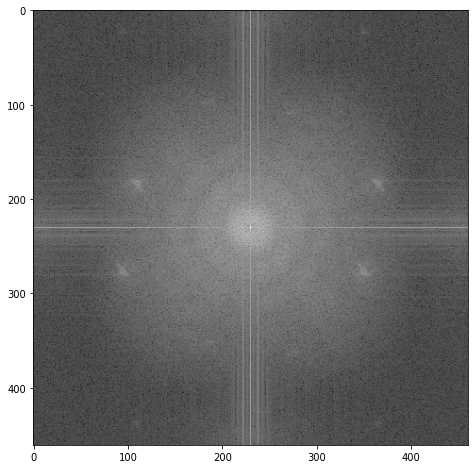

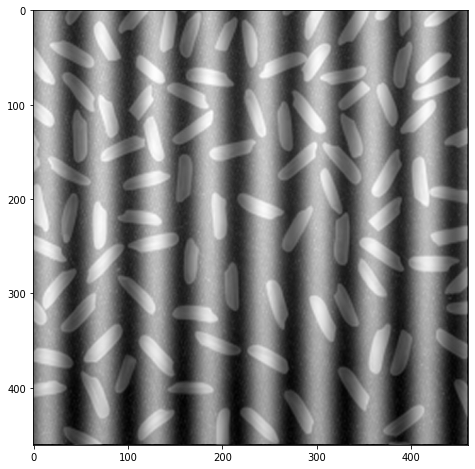

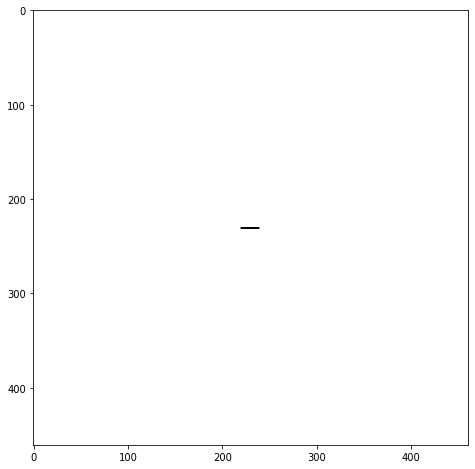

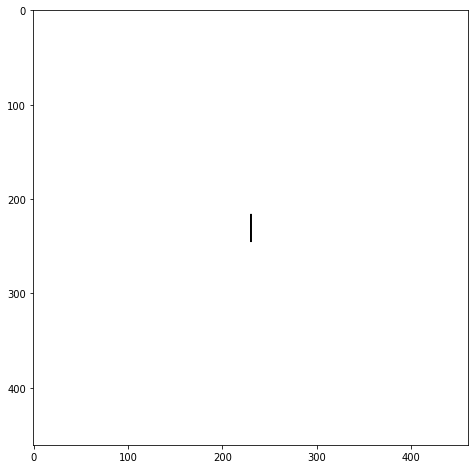

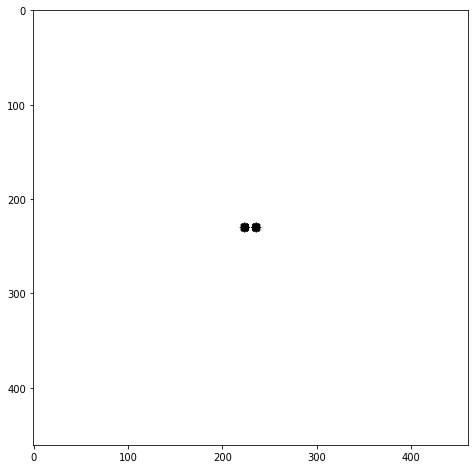

/tmp/ipykernel_5932/3410642121.py:65: RuntimeWarning: divide by zero encountered in log
  masked_magnitude = 20 * np.log(np.abs(mask_on_fft))


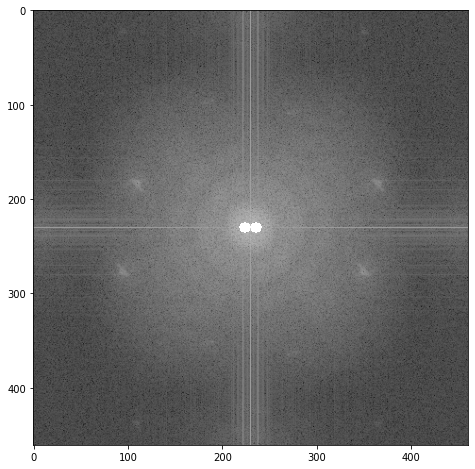

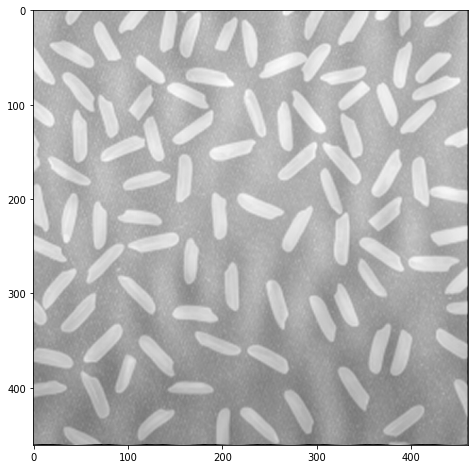

118


In [4]:
# Count objects for the third image with sinus noise => cannot use normal filter to blur(remove noise)
img = cv2.imread("Photos/Rice/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png")
# img = cv2.imread('Photos/Rice/1_wIXlvBeAFtNVgJd49VObgQ.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Use FFT (frequency domain) => Idea: remove frequencies that are perpendicular to the boundary changes of frequency in the image (which means need to remove horizontal lines in frequency domain

# compute the FFT to find the frequency transform
# then shift the zero frequency component (DC component that located in the top-left corner) to the center where it will be easier to analyze
fft = np.fft.fft2(gray)
img_fft_shift = np.fft.fftshift(fft)  # This is in complex field

# compute the magnitude spectrum of the transform
# magnitude = np.log(1 + np.abs(img_fft_shift))
magnitude = 20 * np.log(np.abs(img_fft_shift))
plt.figure("Fourier Transform of the Image", figsize=(8, 8))
plt.imshow(magnitude, cmap='gray')
plt.show()


# Convert from frequency domain back to image by Inv FFT
inverted_fft = np.fft.ifftshift(img_fft_shift)
inverted_fft = np.fft.ifft2(inverted_fft)
inverted_fft = np.absolute(inverted_fft)
plt.figure("Inverse Fourier Transform", figsize=(8, 8))
plt.imshow(inverted_fft, cmap='gray')
plt.show()

w, h = gray.shape
freq_hor_mask = np.ones((w, h))
xi_hor = int(np.round(h / 2 - 1))
xf_hor = int(np.round(h / 2 + 1))
yi_hor = int(np.round(w / 2 - 10))
yf_hor = int(np.round(w / 2 + 10))
freq_hor_mask[xi_hor:xf_hor, yi_hor:yf_hor] = 0
# low_freq_mask[xi_low - 3:xi_low - 1, yi_low:yf_low] = 0
# low_freq_mask[xf_low + 1:xf_low + 3, yi_low:yf_low] = 0
plt.figure("Horizontal frequency value mask", figsize=(8, 8))
plt.imshow(freq_hor_mask, cmap='gray')
plt.show()

freq_vert_mask = np.ones((w, h))
xi_vert = int(np.round(h / 2 - 15))
xf_vert = int(np.round(h / 2 + 15))
yi_vert = int(np.round(w / 2 - 1))
yf_vert = int(np.round(w / 2 + 1))
freq_vert_mask[xi_vert:xf_vert, yi_vert:yf_vert] = 0
# high_freq_mask[xi_high:xf_high, 0:20] = 0
plt.figure("Vertical frequency value mask", figsize=(8, 8))
plt.imshow(freq_vert_mask, cmap='gray')
plt.show()

circle = np.ones((w, h))
left_boundary = cv2.circle(circle, (h // 2 - 6, w // 2), 5, 0, -1)
right_boundary = cv2.circle(circle,(h // 2 + 6, w // 2), 5, 0, -1)
plt.figure("Left Point masks", figsize=(8, 8))
plt.imshow(left_boundary, cmap='gray')
plt.show()

# print(left_boundary)
# cv2.imshow('Circle mask', left_boundary)

# NOTE: NEED TO BE FIXED
# mask_on_fft = freq_hor_mask * img_fft_shift * freq_vert_mask
mask_on_fft = left_boundary * img_fft_shift * right_boundary
masked_magnitude = 20 * np.log(np.abs(mask_on_fft))
plt.figure("After applying mask on shifted FFT", figsize=(8, 8))
plt.imshow(masked_magnitude, cmap='gray')
plt.show()

inverted_shift_fft = np.fft.ifftshift(mask_on_fft)
converted_img = np.abs(np.fft.ifft2(inverted_shift_fft))
plt.figure("Filtered Value Channel of the Image", figsize=(8, 8))
plt.imshow(converted_img, cmap='gray')
plt.show()

converted_img = np.array(converted_img, dtype='uint8')
cv2.imshow('Converted Image', converted_img)

# Try another way: use mask directly in img_fft_shift
# frequency_image = img_fft_shift.copy()
# frequency_image[xi:xf, 0:w] = 0
# another_magnitude = 20 * np.log(np.abs(frequency_image))
# plt.figure("Magnitude spectrum after applying another mask on shifted FFT", figsize=(8, 8))
# plt.imshow(magnitude, cmap='gray')
# plt.show()
#
# converted_frequency_img = np.abs(np.fft.ifft2(np.fft.ifftshift(frequency_image)))
# plt.figure("Another way of applying mask in the frequency domain", figsize=(8, 8))
# plt.imshow(converted_frequency_img, cmap='gray')
# plt.show()

blur = cv2.medianBlur(converted_img, 9)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, -5)
cv2.imshow('Thresh', thresh)
# Apply opening to remove small objects
# rectangular structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# cv2.imshow('Closing', closing)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
cv2.imshow("Opening", opening)
opening = np.array(opening, dtype='uint8')
# print(opening.dtype)
# Count object by counting the contour shapes
contours, hierarchy = cv2.findContours(
    opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
objects = str(len(contours))
text = str(objects)
cv2.putText(opening, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
            0.4, (255, 0, 0), 1, cv2.LINE_AA)

cv2.drawContours(img, contours, -1, (255, 0, 0), 3)
print(objects)
cv2.imshow('Contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
# Count objects for the fourth image (the difference between gray level of each pixel is low
img = cv2.imread("Photos/Rice/1_zd6ypc20QAIFMzrbCmJRMg.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove noise using median blur
blur = cv2.medianBlur(gray, 5)

# After testing the threshold value, I think 116 or 117 would be appropriate bc after thresholding, I apply opening to remove small objects.
_, thresh = cv2.threshold(blur, 2, 255, cv2.THRESH_BINARY)

# Apply opening to remove small objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # rectangular structuring element
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Count object by counting the contour shapes
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
objects = str(len(contours))
text = str(objects)
cv2.putText(opening, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
            0.4, (255, 0, 0), 1, cv2.LINE_AA)
print(objects)

cv2.drawContours(img, contours, -1, (255, 0, 0), 3)
cv2.imshow('Thresh', thresh)
cv2.imshow('Opening', opening)
cv2.imshow('Contours', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

97


In [6]:
# Series to handle all photos

# FFT
def fft_transform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_fft_shift = np.fft.fftshift(fft)  

    # magnitude = np.log(1 + np.abs(img_fft_shift))
    magnitude = 20 * np.log(np.abs(img_fft_shift))

    # Convert from frequency domain back to image by Inv FFT
    inverted_fft = np.fft.ifftshift(img_fft_shift)
    inverted_fft = np.fft.ifft2(inverted_fft)
    inverted_fft = np.absolute(inverted_fft)

    circle = np.ones((w, h))
    left_boundary = cv2.circle(circle, (h // 2 - 6, w // 2), 5, 0, -1)
    right_boundary = cv2.circle(circle, (h // 2 + 6, w // 2), 5, 0, -1)

    mask_on_fft = left_boundary * img_fft_shift * right_boundary

    inverted_shift_fft = np.fft.ifftshift(mask_on_fft)
    converted_img = np.abs(np.fft.ifft2(inverted_shift_fft))

    converted_img = np.array(converted_img, dtype='uint8')

    return converted_img


def median_blur(image):
    blurred = cv2.medianBlur(image, 5)
    return blurred

def canny_detector(image):
    edge = cv2.Canny(image, 30, 150, 3)
    ret2,th2 = cv2.threshold(image, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  
    return edge

def erode_image(image, kernel):
    # thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, -5)
    eroded = cv2.erode(image, kernel)
    return eroded

def opening_image(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return opening


101
101
101
101


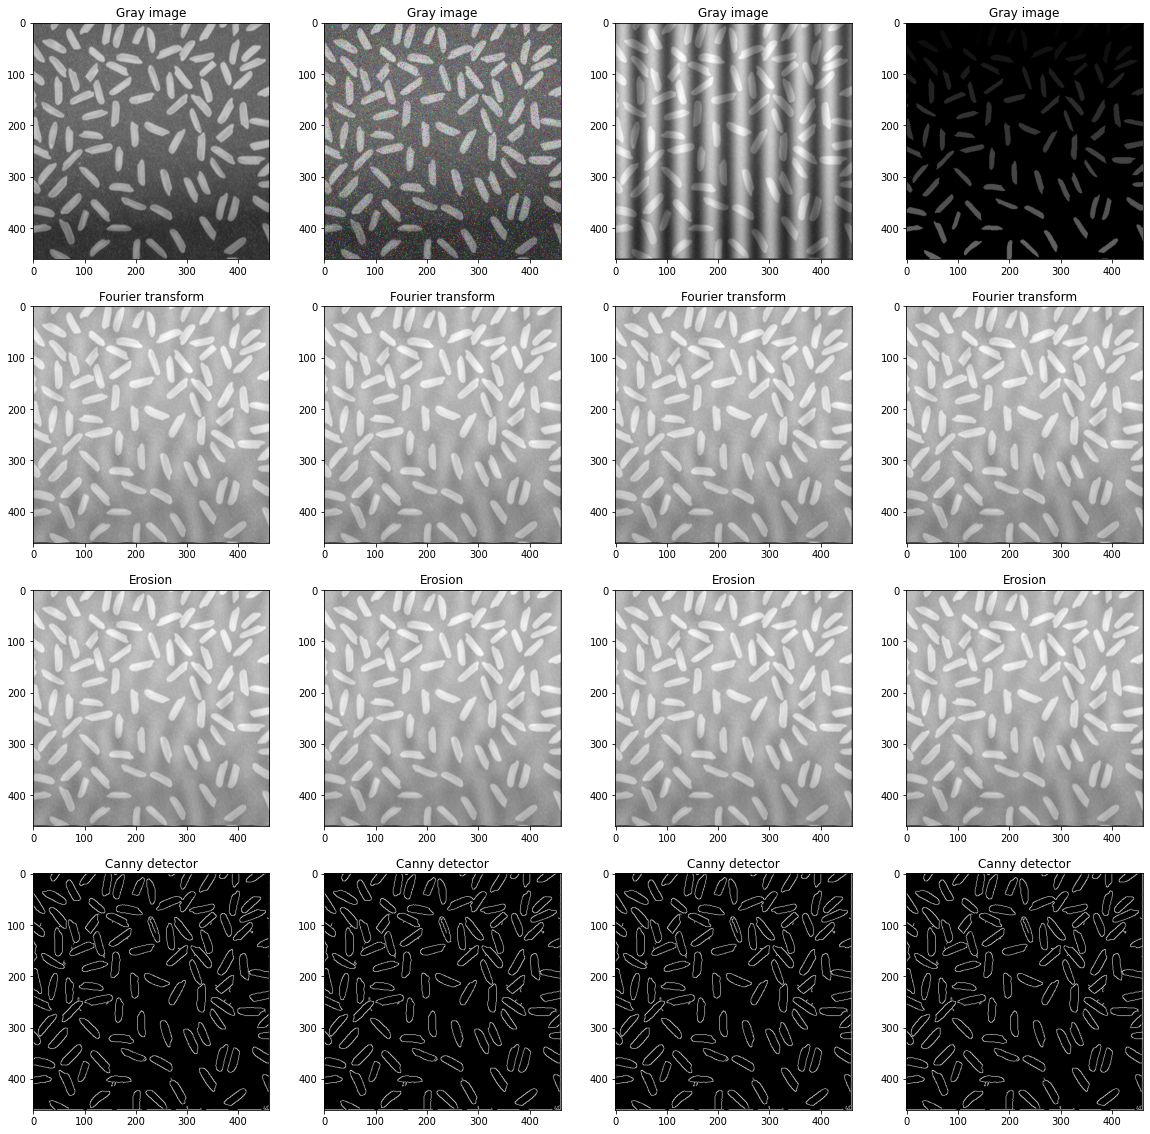

In [15]:
height = 4
width = 4

fig, axarr = plt.subplots(height, width) 
fig.set_figheight(height * 5)
fig.set_figwidth(width * 5)

rice_1 = cv2.imread('Photos/Rice/1_wIXlvBeAFtNVgJd49VObgQ.png')
rice_2 = cv2.imread('Photos/Rice/1_wIXlvBeAFtNVgJd49VObgQ.png_Salt_Pepper_Noise1.png')
rice_3 = cv2.imread('Photos/Rice/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png')
rice_4 = cv2.imread('Photos/Rice/1_zd6ypc20QAIFMzrbCmJRMg.png')

images = [rice_1, rice_2, rice_3, rice_4]

for image in range(len(images)):
    axarr[0][image].imshow(images[image], cmap='gray')
    axarr[0][image].title.set_text('Gray image')
    
    fourier = fft_transform(images[image])
    axarr[1][image].imshow(fourier, cmap='gray')
    axarr[1][image].title.set_text('Fourier transform')

    eroded = erode_image(fourier, (3, 3))
    axarr[2][image].imshow(eroded, cmap='gray')
    axarr[2][image].title.set_text('Erosion')

    # blurred = median_blur(eroded)
    # # opening = opening_image(blurred)
    # axarr[3][image].imshow(blurred, cmap='gray')
    # axarr[3][image].title.set_text('Median blur')

    canny = canny_detector(eroded)
    axarr[3][image].imshow(canny, cmap='gray')
    axarr[3][image].title.set_text('Canny detector')

    contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    objects = int(str(len(contours)))
    print(objects)
  
plt.show()